<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [11]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.neighbors import KNeighborsClassifier
# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1
...,...,...,...,...,...,...
19995,1,22,1,0.614551,0,0
19996,3,154,0,1.000000,1,1
19997,4,109,0,0.935848,1,0
19998,2,197,0,0.481772,0,0


Esta es la cantida de NA que existe: 
 num_links       0
num_words       0
has_offer       0
sender_score    0
all_caps        0
is_spam         0
dtype: int64
Esta es la estadística descriptiva de los datos: 



,num_links,num_words,has_offer,sender_score,all_caps,is_spam
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,1.497300,109.506150,0.302750,0.694248,0.097800,0.09175
std,1.220478,51.969579,0.459459,0.188312,0.297051,0.28868
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,64.000000,0.000000,0.567073,0.000000,0.00000
50%,1.000000,110.000000,0.000000,0.699740,0.000000,0.00000
75%,2.000000,154.000000,1.000000,0.834083,0.000000,0.00000
max,9.000000,199.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

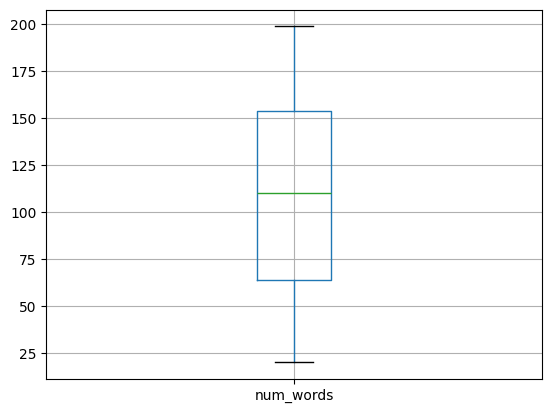

In [3]:
url = "https://raw.githubusercontent.com/Johnny-W-05/Aprendizaje-Automatico/main/dataset/spam_detection_dataset.csv"
df = pd.read_csv(url) #Cargamos los datos
display(df) #Mostramos los datos
#Revisamos si existen na:
print("Esta es la cantida de NA que existe: \n", df.isna().sum())#No tiene NA´s
#Mostramos con estáadística descriptiva los datos
print("Esta es la estadística descriptiva de los datos: \n")
display(df.describe())
#Revisamos con una caja los datos que aparentan más desviación (num_words y num_links)
df.boxplot('num_words')

<Axes: >

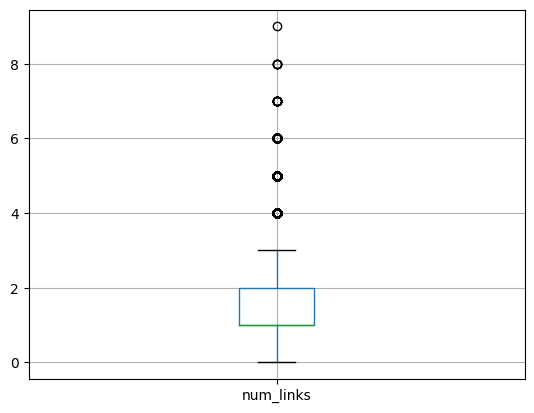

In [4]:
df.boxplot('num_links')

<Axes: xlabel='is_spam'>

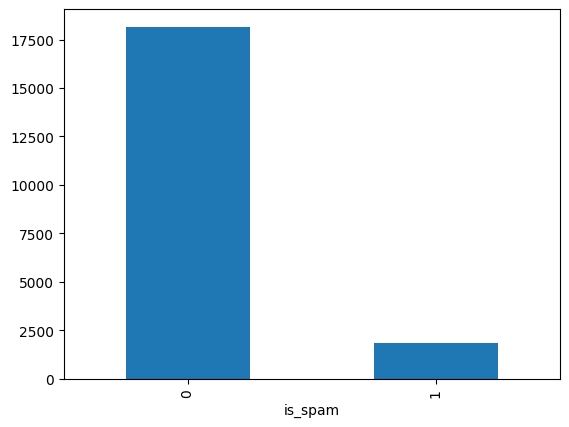

In [5]:
#Y por último de la variable objetivo de este dataset que es is_spam hacemos un barplot por ser categórica
df.is_spam.value_counts().plot(kind='bar')
#Vemos que su distribución es casi todos como no spam y solo algunos como spam.

In [6]:
#Escalamos todos los datos excepto la variable objetivo (is_spam)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('is_spam', axis=1))
#volvemos a hacerle un dataframe con los datos escalados y juntando is_spam
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['is_spam'] = df['is_spam']
#finalmente, dividimos en x y y estos valores
X = df_scaled.drop('is_spam', axis=1)
y = df_scaled['is_spam']


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


In [7]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [8]:
#Ponemos en una lista los distintos kernels:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#lista para guardar las precisiones
precisiones = []
for kernel in kernels:
    # Crear el modelo SVM con el kernel actual
    svm = SVC(kernel=kernel)
    # Entrenar el modelo con los datos de entrenamiento
    svm.fit(X_train, y_train)
    # Predecir las etiquetas de los datos de prueba
    y_pred = svm.predict(X_test)
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo con kernel {kernel}: {accuracy}")
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    print(cm)

    # Reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    #Guardamos los valores
    precisiones.append(accuracy)

Precisión del modelo con kernel linear: 0.94175
Matriz de confusión:
[[3576   53]
 [ 180  191]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3629
           1       0.78      0.51      0.62       371

    accuracy                           0.94      4000
   macro avg       0.87      0.75      0.79      4000
weighted avg       0.94      0.94      0.94      4000

Precisión del modelo con kernel poly: 0.95925
Matriz de confusión:
[[3549   80]
 [  83  288]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3629
           1       0.78      0.78      0.78       371

    accuracy                           0.96      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.96      0.96      0.96      4000

Precisión del modelo con kernel rbf: 0.9575
Matriz de confusión:
[[3547   82]
 [  88  283]]
Reporte de c

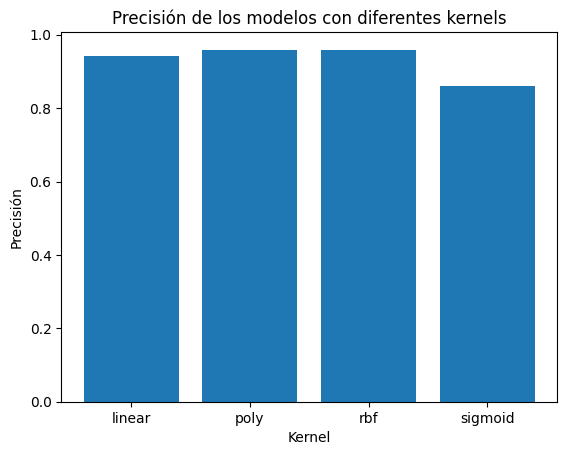

In [9]:
#Graficamos los accuracy de acuerdo al kernel utilizado
plt.bar(kernels, precisiones)
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.title('Precisión de los modelos con diferentes kernels')
plt.show()


De acuerdo a este gráfico podemos observar que en realidad los tres primeros tipos de kernel de esta gráfica (lineal, rbf y poly) tienen buenos porcentajes de accuracy a comparación de el kernel tipo sigmoide. Quien parece tener incluso mejor accuracy entre los tres es el kernel tipo rbf y de acuerdo a los datos de arriba efectivamente vemos que es así. Por tanto elegiríamos este kernel.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [10]:
# Crear el modelo SVM con el kernel elegido
svm = SVC(kernel="rbf")
# Entrenar el modelo con los datos de entrenamiento
svm.fit(X_train, y_train)
# Predecir las etiquetas de los datos de prueba
y_pred = svm.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con kernel {kernel}: {accuracy}")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
#Guardamos los valores
precisiones.append(accuracy)

Precisión del modelo con kernel sigmoid: 0.9575
Matriz de confusión:
[[3547   82]
 [  88  283]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3629
           1       0.78      0.76      0.77       371

    accuracy                           0.96      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.96      0.96      0.96      4000



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

In [13]:
#Hacemos un modelo de KNN para comparar:
# Crear y entrenar el modelo kNN con k=5
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.954
Matriz de confusión:
[[3550   79]
 [ 105  266]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3629
           1       0.77      0.72      0.74       371

    accuracy                           0.95      4000
   macro avg       0.87      0.85      0.86      4000
weighted avg       0.95      0.95      0.95      4000



De acuerdo a las métricas y la matriz de confusión presentada, vemos que por ejemplo comparando el modelo SVM con un kernel rbf y un modelo KNN con $k = 5$ vecinos, las pruebas indican que el modelo SVM es ligeramente mejor. No obstante, ambos modelos tienen buenas métricas y solo se resalta la matriz de confusión de KNN que tiende a fallar más dando más valores como falsos negativos.